# Visualización de datos

## 0. Introducción
En este Jupyter Notebook se encuentran los resultados de anáilisis en base a los **Data Products** resultantes.

## 1. Cargar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Cargar datos (Data)

In [3]:
dp1 = pd.read_csv('Data/DP1_covid19-peru_x_semanaEpi.csv')
dp1.head()

,year,epi_week,total_casos,total_fallecidos,total_dosis_1,total_dosis_2,total_dosis_3,0_17_cas,18_29_cas,30_39_cas,...,LORETO_vac,MADRE DE DIOS_vac,MOQUEGUA_vac,PASCO_vac,PIURA_vac,PUNO_vac,SAN MARTIN_vac,TACNA_vac,TUMBES_vac,UCAYALI_vac
0,2020,10,6,3,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,11,51,3,0,0,0,5,16,8,...,0,0,0,0,0,0,0,0,0,0
2,2020,12,279,36,0,0,0,16,69,56,...,0,0,0,0,0,0,0,0,0,0
3,2020,13,458,64,0,0,0,12,59,107,...,0,0,0,0,0,0,0,0,0,0
4,2020,14,1993,227,0,0,0,69,424,429,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dp2 = pd.read_csv('Data/DP2_covid19-peru_resumen_x_departamentos.csv')

total_row = pd.DataFrame(dp2.sum())
total_row = total_row.transpose()

total_row.iloc[0,0] = 'PERÚ'

total_row['tasa_mortalidad'][0] = round((total_row['fallecidos'][0]/total_row['no_habitantes'][0])*100000,2)
total_row['vac_porcentaje'][0]= round((total_row['dosis_2'][0]*100)/total_row['no_habitantes'][0],2)

dp2 = pd.concat([dp2, total_row])
dp2 = dp2.reset_index(drop=True)

dp2.tail()

,departamento,no_habitantes,casos,fallecidos,dosis_1,dosis_2,dosis_3,tasa_mortalidad,vac_porcentaje
21,SAN MARTIN,899648,49736,3039,620031,538641,94861,337.8,59.87
22,TACNA,370974,32170,1980,274852,247002,56496,533.73,66.58
23,TUMBES,251521,19702,1597,193013,155586,34472,634.94,61.86
24,UCAYALI,589110,32429,3088,382557,302561,59146,524.18,51.36
25,PERÚ,32625948,2340179,202981,24786135,22271123,5994692,622.15,68.26


## 3. Visualización de datos

### Total de muertes confirmadas por COVID-19 en Perú

Fecha de la segunda ola tomada del [Documento Técnico: Plan Nacional Actualizado de Vacunación contra la COVID-19](https://cdn.www.gob.pe/uploads/document/file/1805113/Plan%20Nacional%20Actualizado%20contra%20la%20COVID-19.pdf)

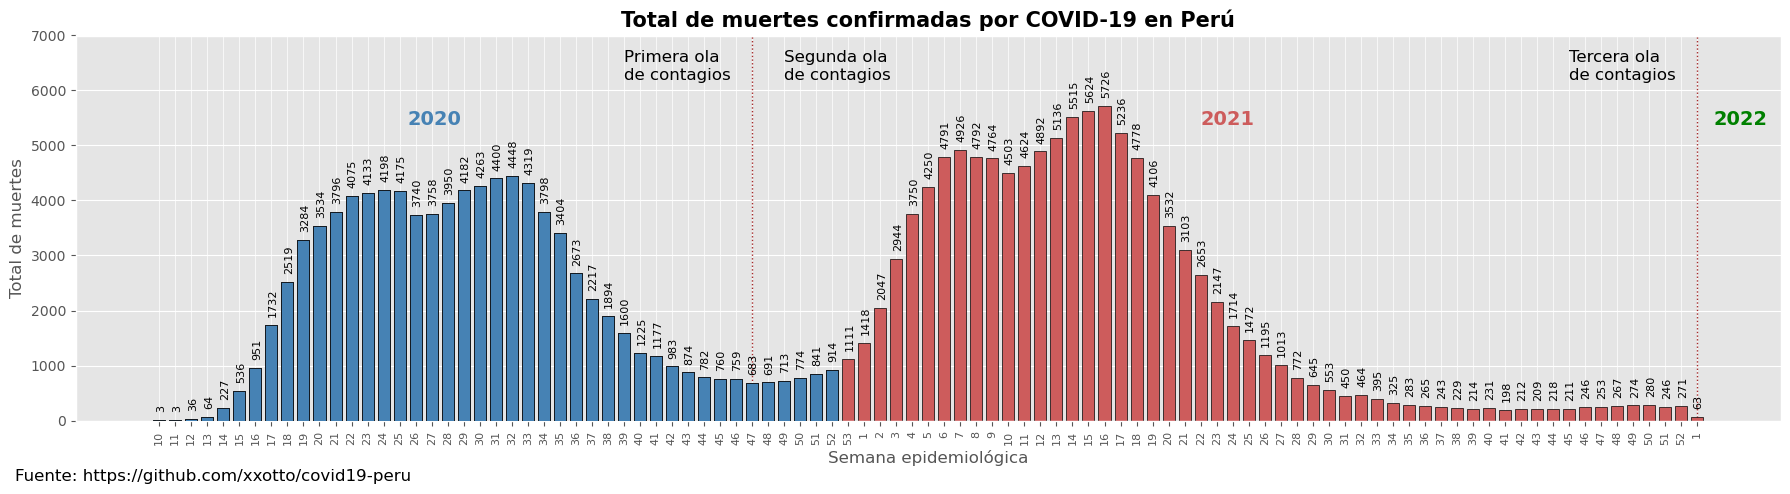

In [42]:
df = dp1[['year', 'epi_week', 'total_fallecidos']]
var_name = 'total_fallecidos'

plt.figure(figsize=(22, 5)) # Create a figure
plt.style.use('ggplot') # Using the style for the plot

width = 0.75 # Bar width
x = np.arange(len(df["epi_week"]))
a = plt.bar(x, df[var_name], width, color="indianred", edgecolor="black", zorder=2) 
plt.bar(np.arange(0,43), df[var_name ].iloc[0:43], width, color="steelblue", edgecolor="black", zorder=3) 

plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis
plt.yticks(np.arange(0, 7500, 1000))  # Range on y axis
plt.title("Total de muertes confirmadas por COVID-19 en Perú", fontsize=15, weight="bold")
plt.xlabel("Semana epidemiológica", fontsize=12)
plt.ylabel("Total de muertes", fontsize = 12)
plt.tick_params(axis="x", labelsize = 8)

def autolabel(rects):
    """Function to label each barplot"""
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2 +.09, 150 + height,
                '%d' % int(height), ha='center', va='bottom',
                rotation = 90, fontsize=8)
        
autolabel(a)

plt.text(15.5, 5375, r"2020", fontsize=14, color = "steelblue", weight="bold")
plt.text(65, 5375, r"2021", fontsize=14, color="indianred", weight="bold")
plt.text(97, 5375, r"2022", fontsize=14, color="green", weight="bold")

# Olas
plt.text(29, 6200, r"""Primera ola
de contagios""", fontsize=12)
plt.text(39, 6200, r"""Segunda ola
de contagios""", fontsize=12)
plt.text(88, 6200, r"""Tercera ola
de contagios""", fontsize=12)

# In week 47 start the new wave (01/12/2020)
plt.axvline(x=37, color="brown", linestyle=":", linewidth=1, zorder=1) 
# In week 1 of 2022 start the new wave (04/01/2022)
plt.axvline(x=96, color="brown", linestyle=":", linewidth=1, zorder=1) 
 
plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
plt.rcParams["axes.axisbelow"] = True
plt.text(-9, -1100, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

#plt.savefig('Images/covid19-peru_fallecidos_x_semanaEpi.png', bbox_inches='tight') # Save figure
plt.show() # Plot figure

***
### Total de muertes confirmadas por COVID-19 en Perú vs porcentaje de la población completamente vacunada

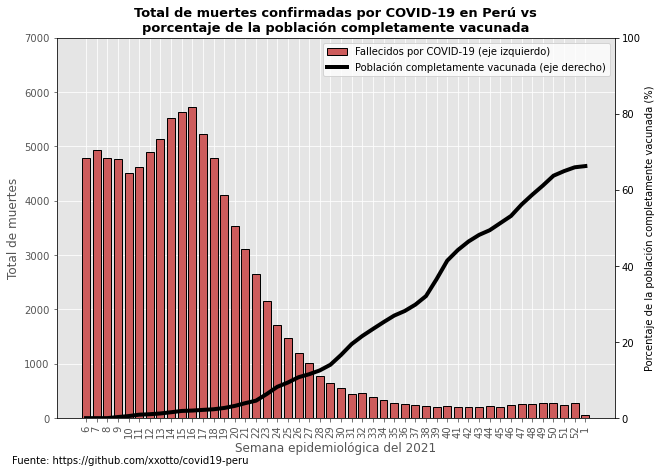

In [6]:
cumsum_vac = pd.DataFrame(round(dp1.total_dosis_2.cumsum()*100/32625948, 2))
var_name = 'total_fallecidos'

fig = plt.figure(figsize=(10, 7)) # Create a figure
ax = fig.add_subplot(111)
plt.style.use('default') # Using the style for the plot

# Fallecidos desde que empezó la jornada de vacunación en semana epi 5 del 2021
fal = dp1[var_name].iloc[49:]

# Primera gráfica de barras
width = 0.75 # Bar width
x = np.arange(len(fal))
ax.bar(x, fal, width, color="indianred", edgecolor="black", zorder=2,
                label='Fallecidos por COVID-19 (eje izquierdo)') 

plt.xticks(x, dp1["epi_week"].iloc[49:], rotation = 90) 
plt.yticks(np.arange(0, 7500, 1000))
plt.ylabel("Total de muertes", fontsize = 12)
plt.tick_params(axis="x", labelsize = 10)
plt.title("""Total de muertes confirmadas por COVID-19 en Perú vs
porcentaje de la población completamente vacunada""",
          fontsize=13, weight="bold")
plt.xlabel("Semana epidemiológica del 2021", fontsize=12)

# Segunda gráfica de frecuencia acumulada de fallecidos
ax2 = plt.twinx()
ax2.plot(x, cumsum_vac ['total_dosis_2'].iloc[49:], color='black', linestyle="-", linewidth=4, 
        label='Población completamente vacunada (eje derecho)')
ax2.set_ylim(0,100,10)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax2.set_ylabel('Porcentaje de la población completamente vacunada (%)')

plt.text(-7, -12, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=10)

plt.savefig('Images/covid19-peru_fallecidos_vs_vacunados_x_semanaEpi.png', bbox_inches='tight')
plt.show() # Plot figure

***
### Número de personas totalmente inmunizadas (2 dosis) contra COVID-19 en Perú por semana epidemiológica

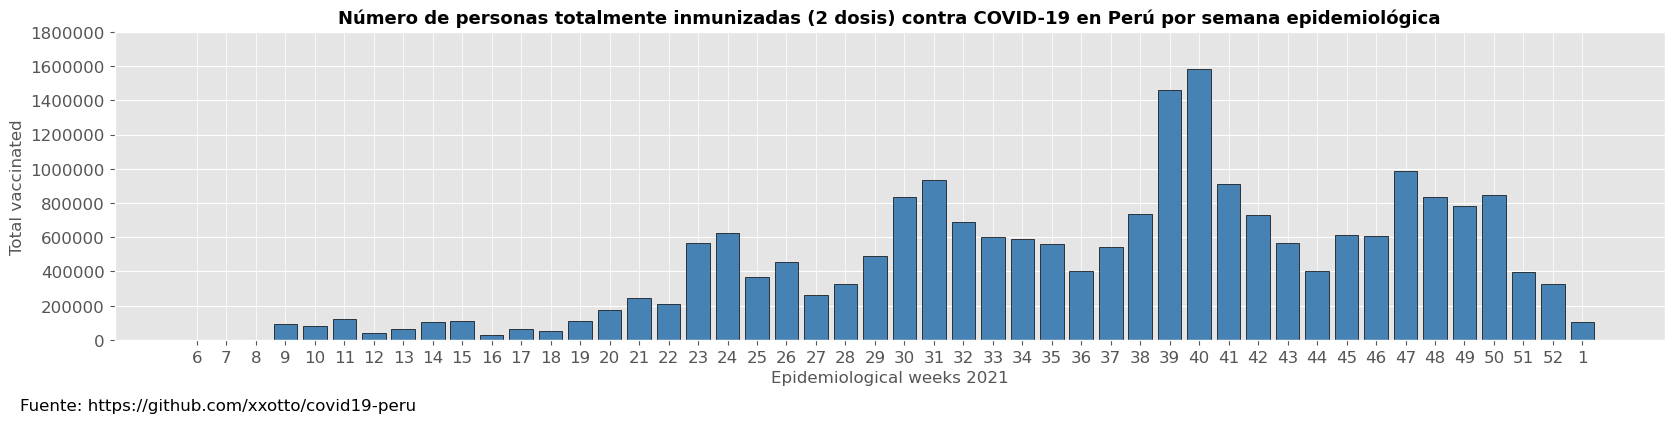

In [7]:
# Barplot of TOTAL VACCINATED
var_name = 'total_fallecidos'
var2_name = 'total_dosis_2'

# Create a figure
plt.figure(figsize=(20, 4))

# Using the style for the plot
plt.style.use('ggplot')
y_position = np.arange(len(dp1["epi_week"].iloc[49:]))
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.bar(y_position, dp1[var2_name].iloc[49:], color="steelblue", edgecolor="black")  # Create bars
plt.xticks(y_position, dp1["epi_week"].iloc[49:])  # Create names on the x-axis
plt.yticks(np.arange(0, 2000000, 200000))
plt.ticklabel_format(axis="y", style="plain")

plt.title("""Número de personas totalmente inmunizadas (2 dosis) contra COVID-19 en Perú por semana epidemiológica""",
          fontsize=13, weight="bold")
plt.xlabel("Epidemiological weeks 2021")
plt.ylabel("Total vaccinated")

plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
plt.rcParams["axes.axisbelow"] = True

plt.text(-6, -410000, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

plt.savefig('Images/covid19-peru_vacunados_x_semanaEpi.png', bbox_inches='tight')
plt.show()

***
### Tasa de mortalidad por COVID-19 (por cada 100 000 habitantes) de cada departamento del Perú

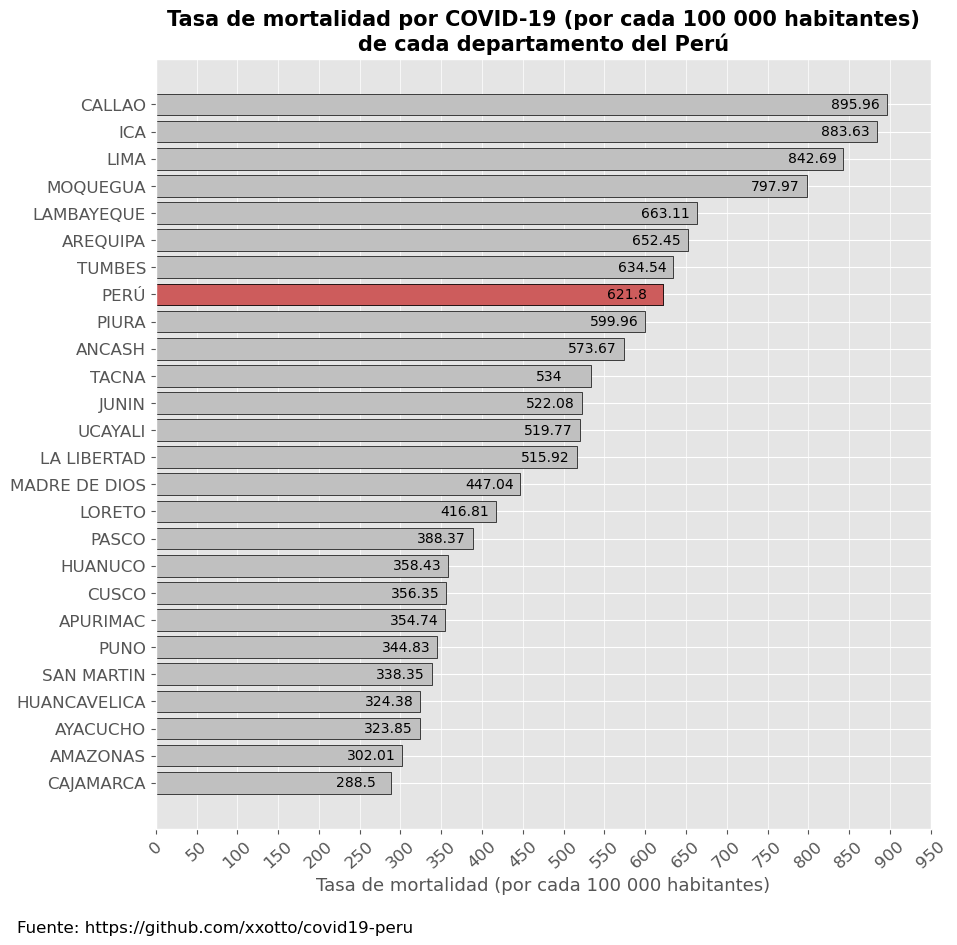

In [8]:
fig, ax = plt.subplots(figsize=(10,10))  # Create a figure
plt.style.use('ggplot')  # Using the style for the plot

y_pos = np.arange(len(dp2["departamentos"]))  # Create y positions
dp2_sorted = dp2.sort_values(by=["tasa_mortalidad"])  # Sort by tasa_mortalidad

bh = plt.barh(y_pos, dp2_sorted["tasa_mortalidad"], color="silver", edgecolor="black")  # Create bars
plt.barh(18, dp2["tasa_mortalidad"].iloc[25], color="indianred", edgecolor="black")

ax.bar_label(ax.containers[0], label_type= 'edge', padding=-40)

# Create names on the x-axis
plt.xticks(np.arange(0, 1000, 50),rotation = 42)
plt.yticks(y_pos, dp2_sorted["departamentos"], fontsize=12)

# Labels
plt.title("Tasa de mortalidad por COVID-19 (por cada 100 000 habitantes)\nde cada departamento del Perú",
         fontsize=15, weight="bold")
plt.xlabel("Tasa de mortalidad (por cada 100 000 habitantes)", fontsize=13)
plt.tick_params(axis="x", labelsize=12)

#plt.axvline(x=613.7630085109, color="brown", linestyle="dashed", linewidth=.75)
# Configure grid
plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
plt.rcParams["axes.axisbelow"] = True
plt.text(-170, -5.5, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

plt.savefig('Images/covid19-peru_fallecidos_x_departamentos.png', bbox_inches='tight')
plt.show()


***
### Porcentaje (%) de la población por cada departamento\ndel Perú con vacunación completa

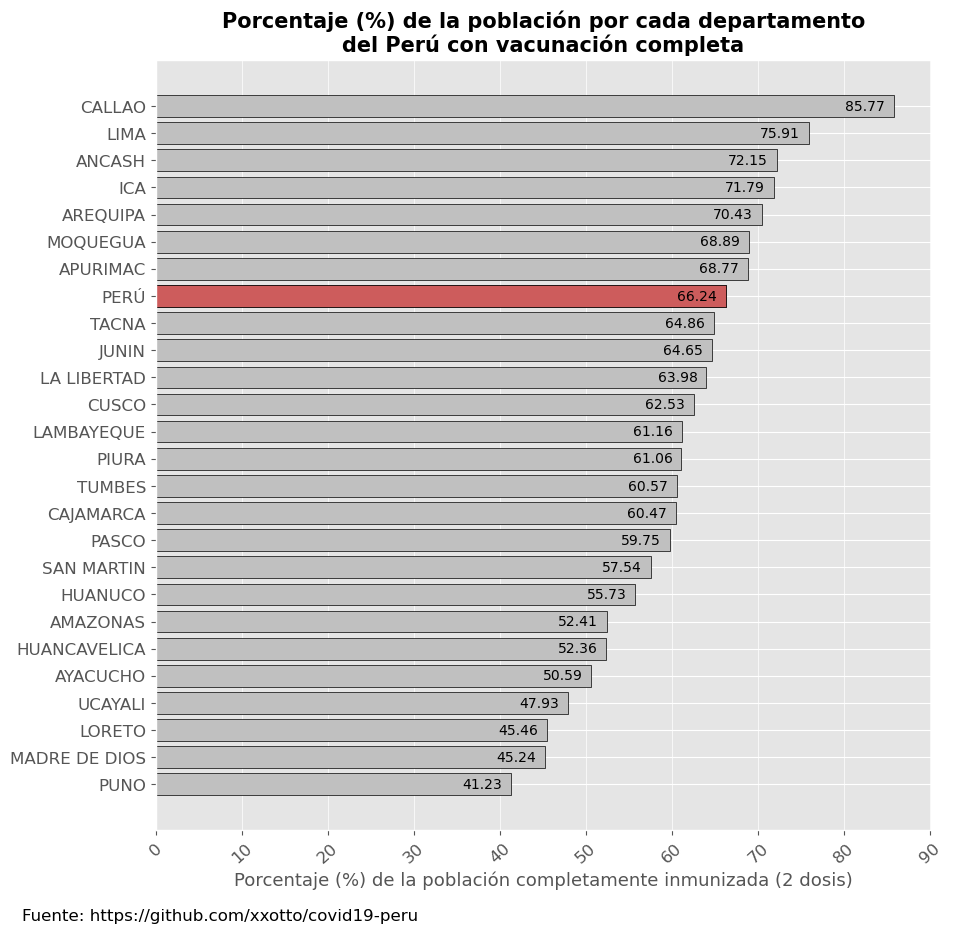

In [9]:
fig, ax = plt.subplots(figsize=(10,10))  # Create a figure
plt.style.use('ggplot')  # Using the style for the plot

# Create y positions
y_pos = np.arange(len(dp2["departamentos"]))
dp2_sorted = dp2.sort_values(by=["vac_porcentaje"])

# Create bars
bh = plt.barh(y_pos, dp2_sorted['vac_porcentaje'], color="silver", edgecolor="black")
plt.barh(18, dp2_sorted['vac_porcentaje'].iloc[18], color="indianred", edgecolor="black")
ax.bar_label(ax.containers[0], label_type= 'edge', padding=-35)

# Create names on the x-axis
plt.xticks(np.arange(0, 100, 10),rotation = 42)
plt.yticks(y_pos, dp2_sorted["departamentos"], fontsize=12)

# Labels
plt.title("Porcentaje (%) de la población por cada departamento\ndel Perú con vacunación completa",
         fontsize=15, weight="bold")
plt.xlabel("Porcentaje (%) de la población completamente inmunizada (2 dosis)", fontsize=13)
plt.tick_params(axis="x", labelsize=12)

#plt.axvline(x=613.7630085109, color="brown", linestyle="dashed", linewidth=.75)
# Configure grid
plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
plt.rcParams["axes.axisbelow"] = True
plt.text(-15.5, -5, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

# Show graphic
plt.savefig('Images/covid19-peru_vacunados_x_departamentos.png', bbox_inches='tight')
plt.show()

***
### Total de muertes confirmadas por COVID-19 en Perú vs porcentaje de la población completamente vacunada de cada departamento

In [10]:
dp2 = dp2.drop(25, axis=0)

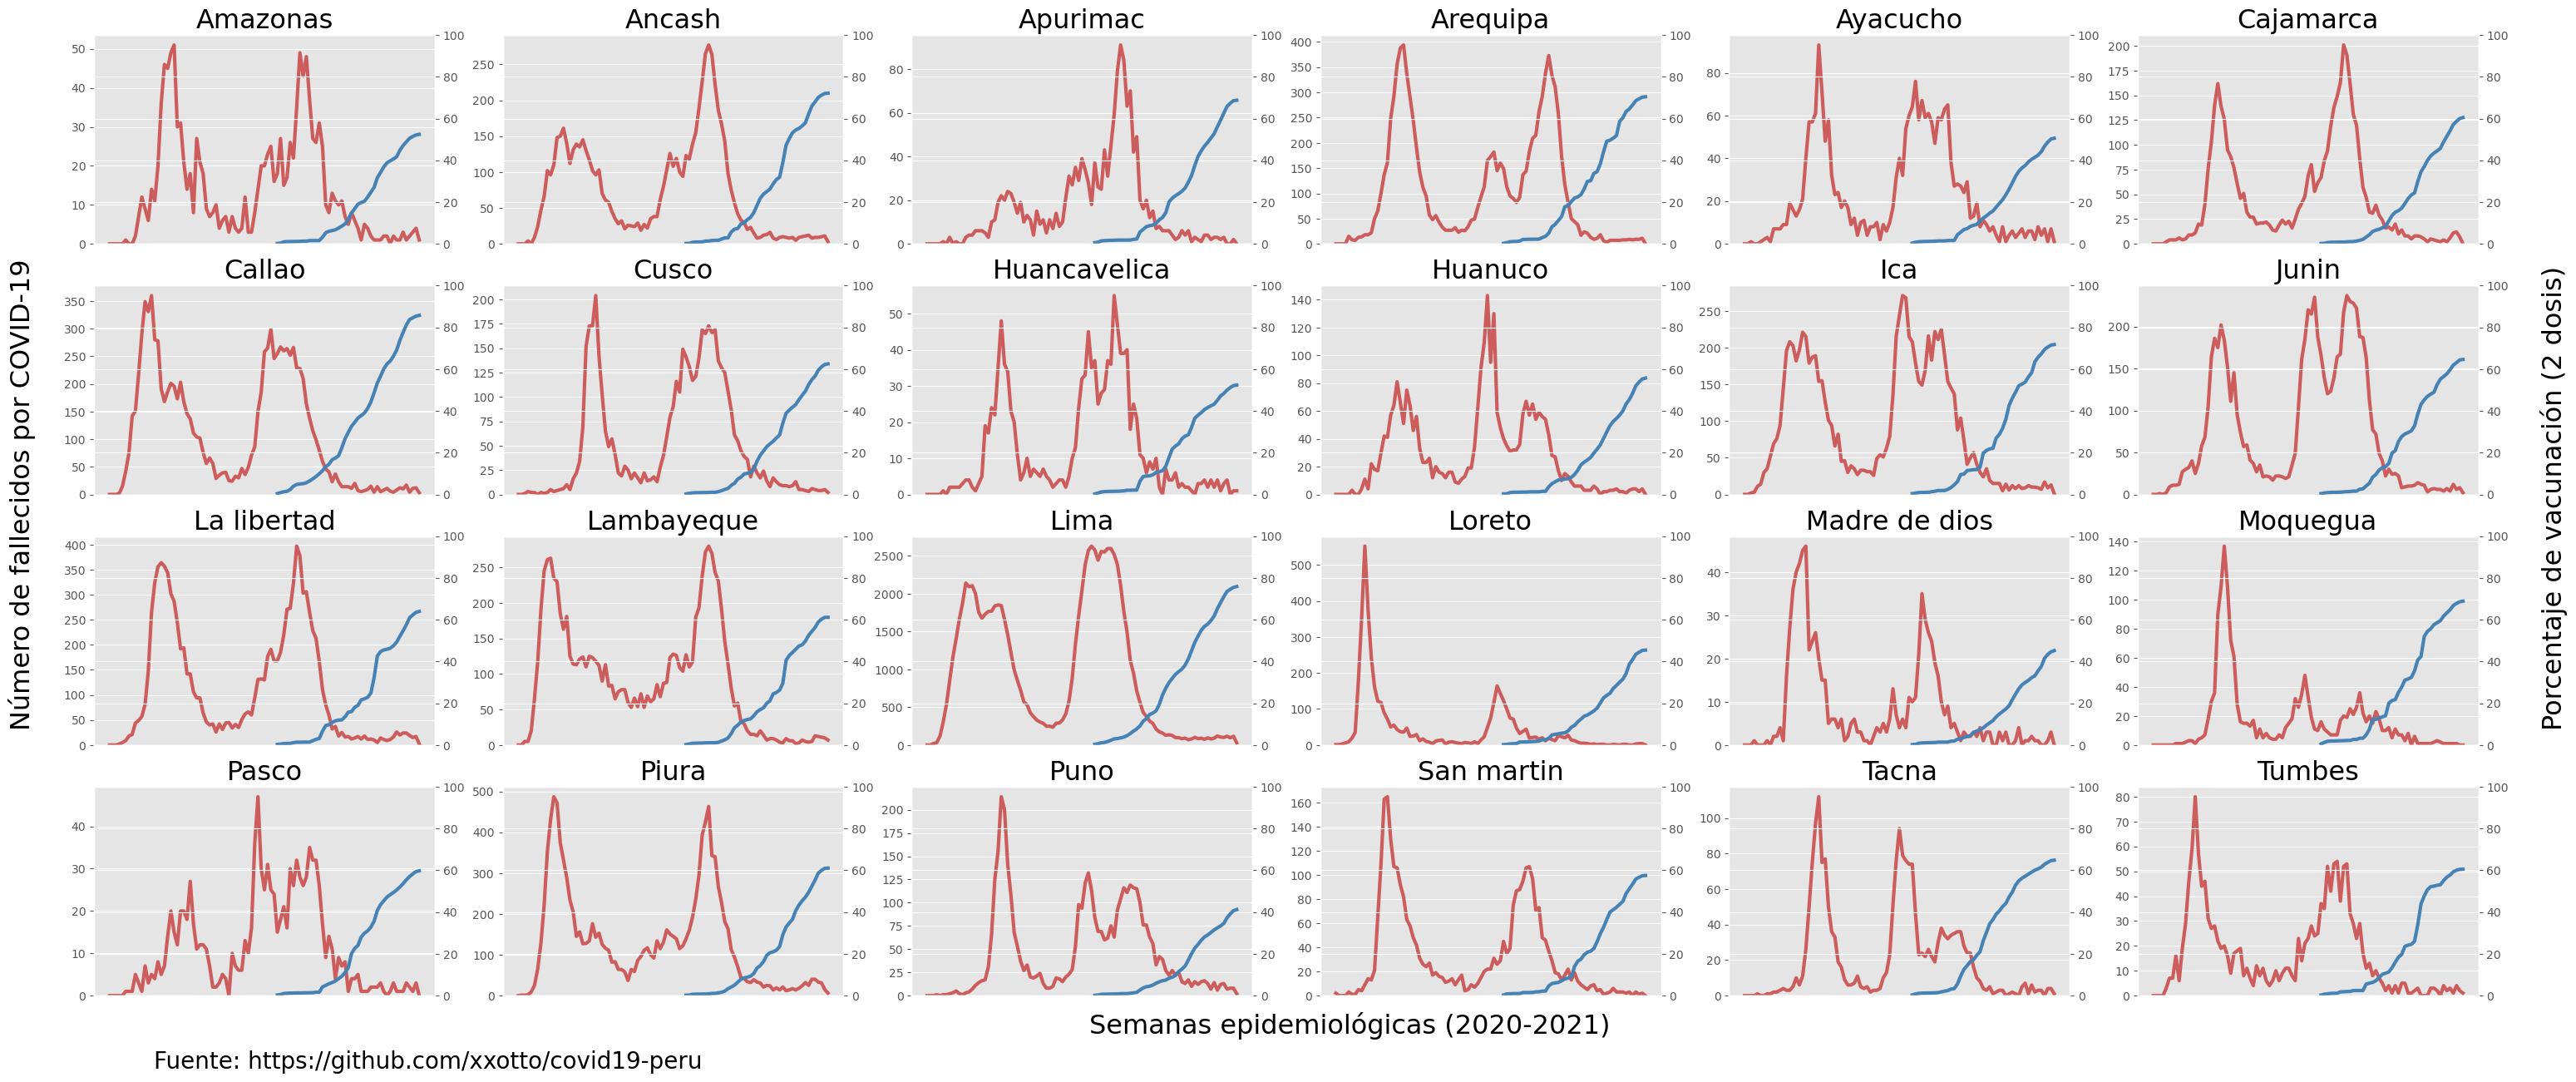

In [11]:
lst_habitantes, lst_cumper_vac = [], []
i, j = 0,0

# Eje X compartido por todos los subplots (epi_weeks)
X = np.arange(len(dp1['epi_week']))

# Initialise the subplot function using number of rows and columns
fig, axis = plt.subplots(4, 6, figsize=(37,15),)
plt.style.use('ggplot')

for idx, departamento in enumerate(dp2.departamentos):
    
    lst_habitantes.append(int(dp2.no_habitantes.loc[dp2.departamentos == departamento]))
    lst_cumper_vac.append(pd.DataFrame(round(dp1[departamento + '_vac'].cumsum()*100/lst_habitantes[idx], 2)))
    # Colocar vacíos antes que empezara la vacunación masiva de segundas dosis
    lst_cumper_vac[idx].loc[0:51] = np.nan

    axis[i, j].plot(X, dp1[dp2.departamentos[idx] + '_fal'], color = 'indianred', linewidth=3)
    axis[i, j].set_title(dp2.departamentos[idx].capitalize(), fontsize=23,)
    axis[i, j].set_ylim(ymin=0)

    axis2 = axis[i, j].twinx()
    axis2.plot(X, lst_cumper_vac[idx], color='steelblue', linewidth=3)
    axis2.set_ylim(0,100,10)

    axis[i, j].get_xaxis().set_visible(False)
    
    j+=1
    if j==6:
        i+=1
        j=0
        if i == 4:
            break

plt.text(-620, -35, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=20)

plt.text(-330, -18, r"Semanas epidemiológicas (2020-2021)", fontsize=23)
plt.text(-665, 130, r"Número de fallecidos por COVID-19", fontsize=23, rotation = 90)
plt.text(120, 130, r"Porcentaje de vacunación (2 dosis)", fontsize=23, rotation = 90)

plt.savefig('Images/covid19-peru_%vacunados_y_fallecidos_x_departamentos.png', bbox_inches='tight')
plt.show()

***
### Total de fallecidos por semanas epidemiológicas por grupos de edades

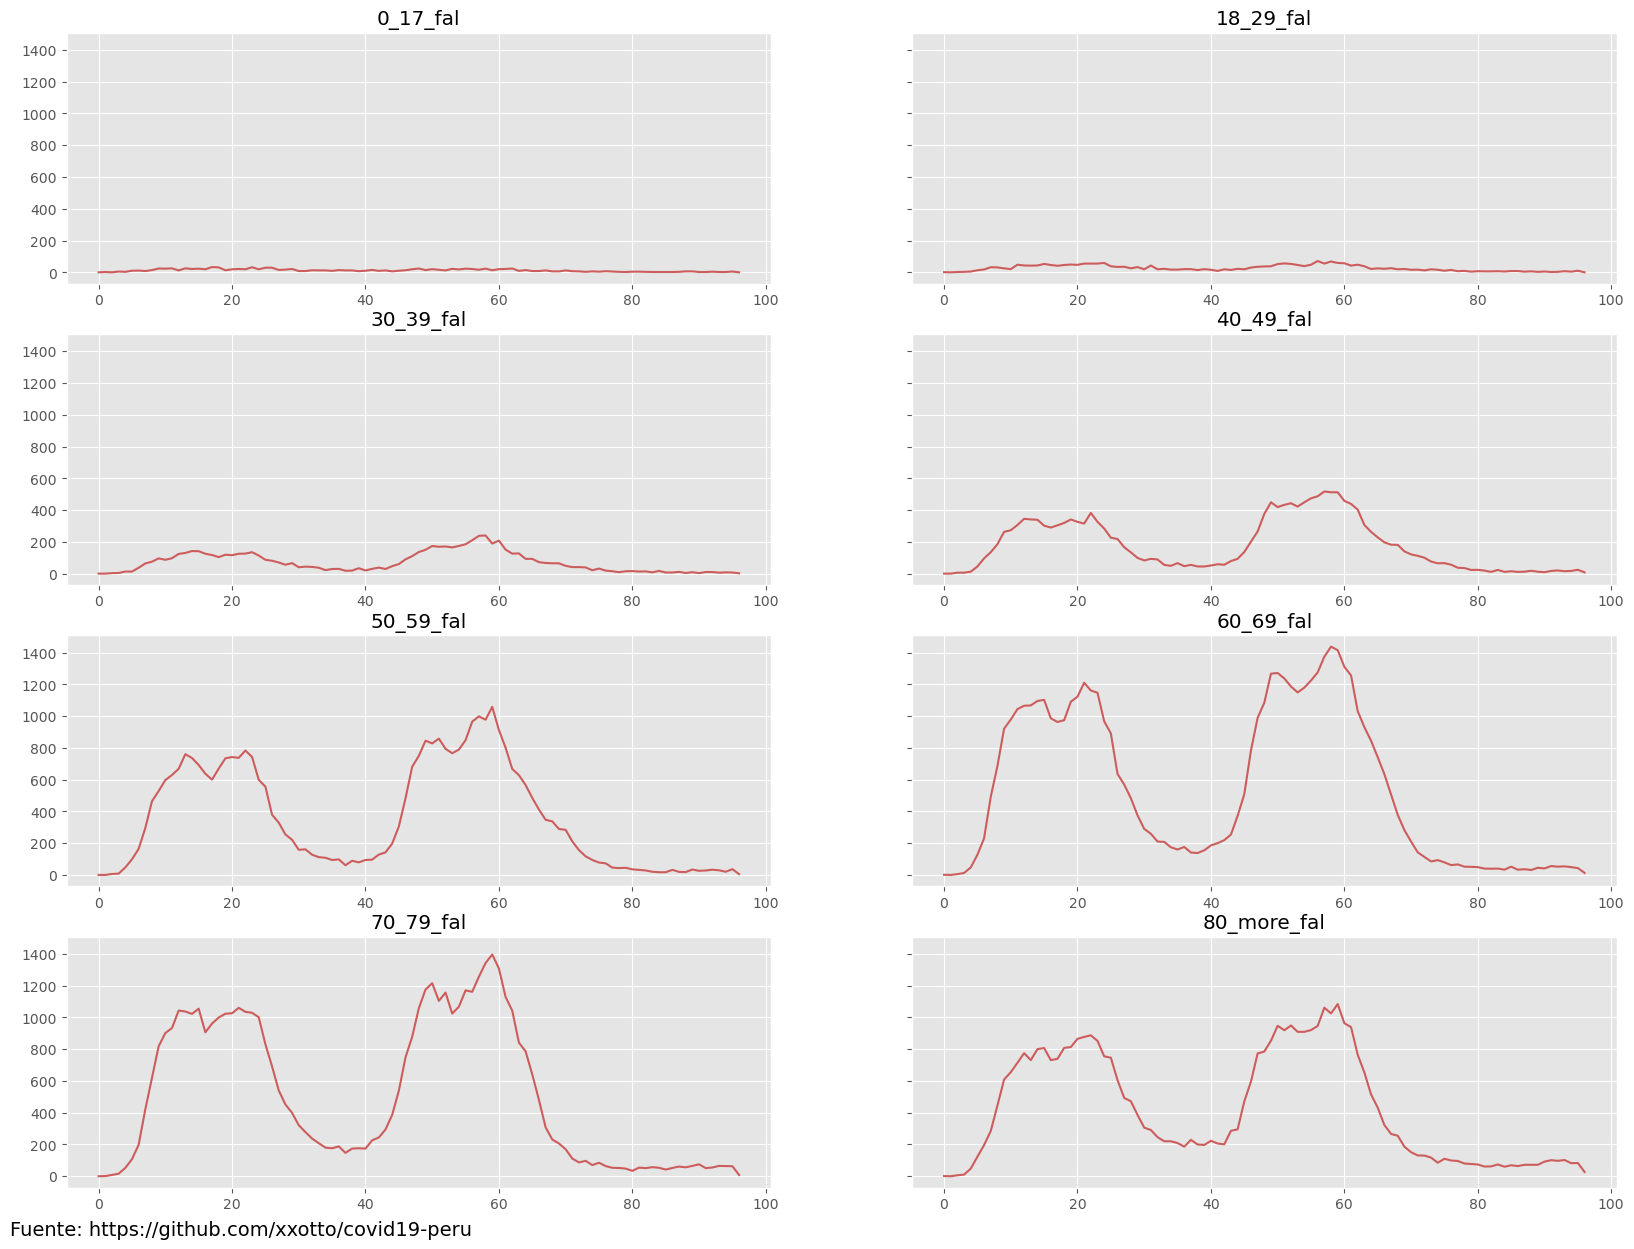

In [12]:
age_lst = list(dp1.columns[7:15])
#age_lst = [name.replace('_fal', '') for name in age_lst]

X = np.arange(len(dp1['epi_week']))
i, j = 0, 0

fig, axis = plt.subplots(4, 2, figsize=(20,15), sharey=True)
plt.style.use('ggplot')

for idx, name in enumerate(age_lst):
    axis[i, j].plot(X, dp1[name], color = 'indianred')
    axis[i, j].set_title(name)

    j+=1
    if j==2:
        i+=1
        j=0
        if i == 4:
            break

plt.text(-140, -370, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=14)
#plt.savefig('Images/covid19-peru_fallecidos_x_edades_x_semanasEpi.png', bbox_inches='tight')

plt.show() 


***
### Resumen de casos positivos, fallecidos y vacunados contra COVID-19 por semana epidemiológica de todo el Perú

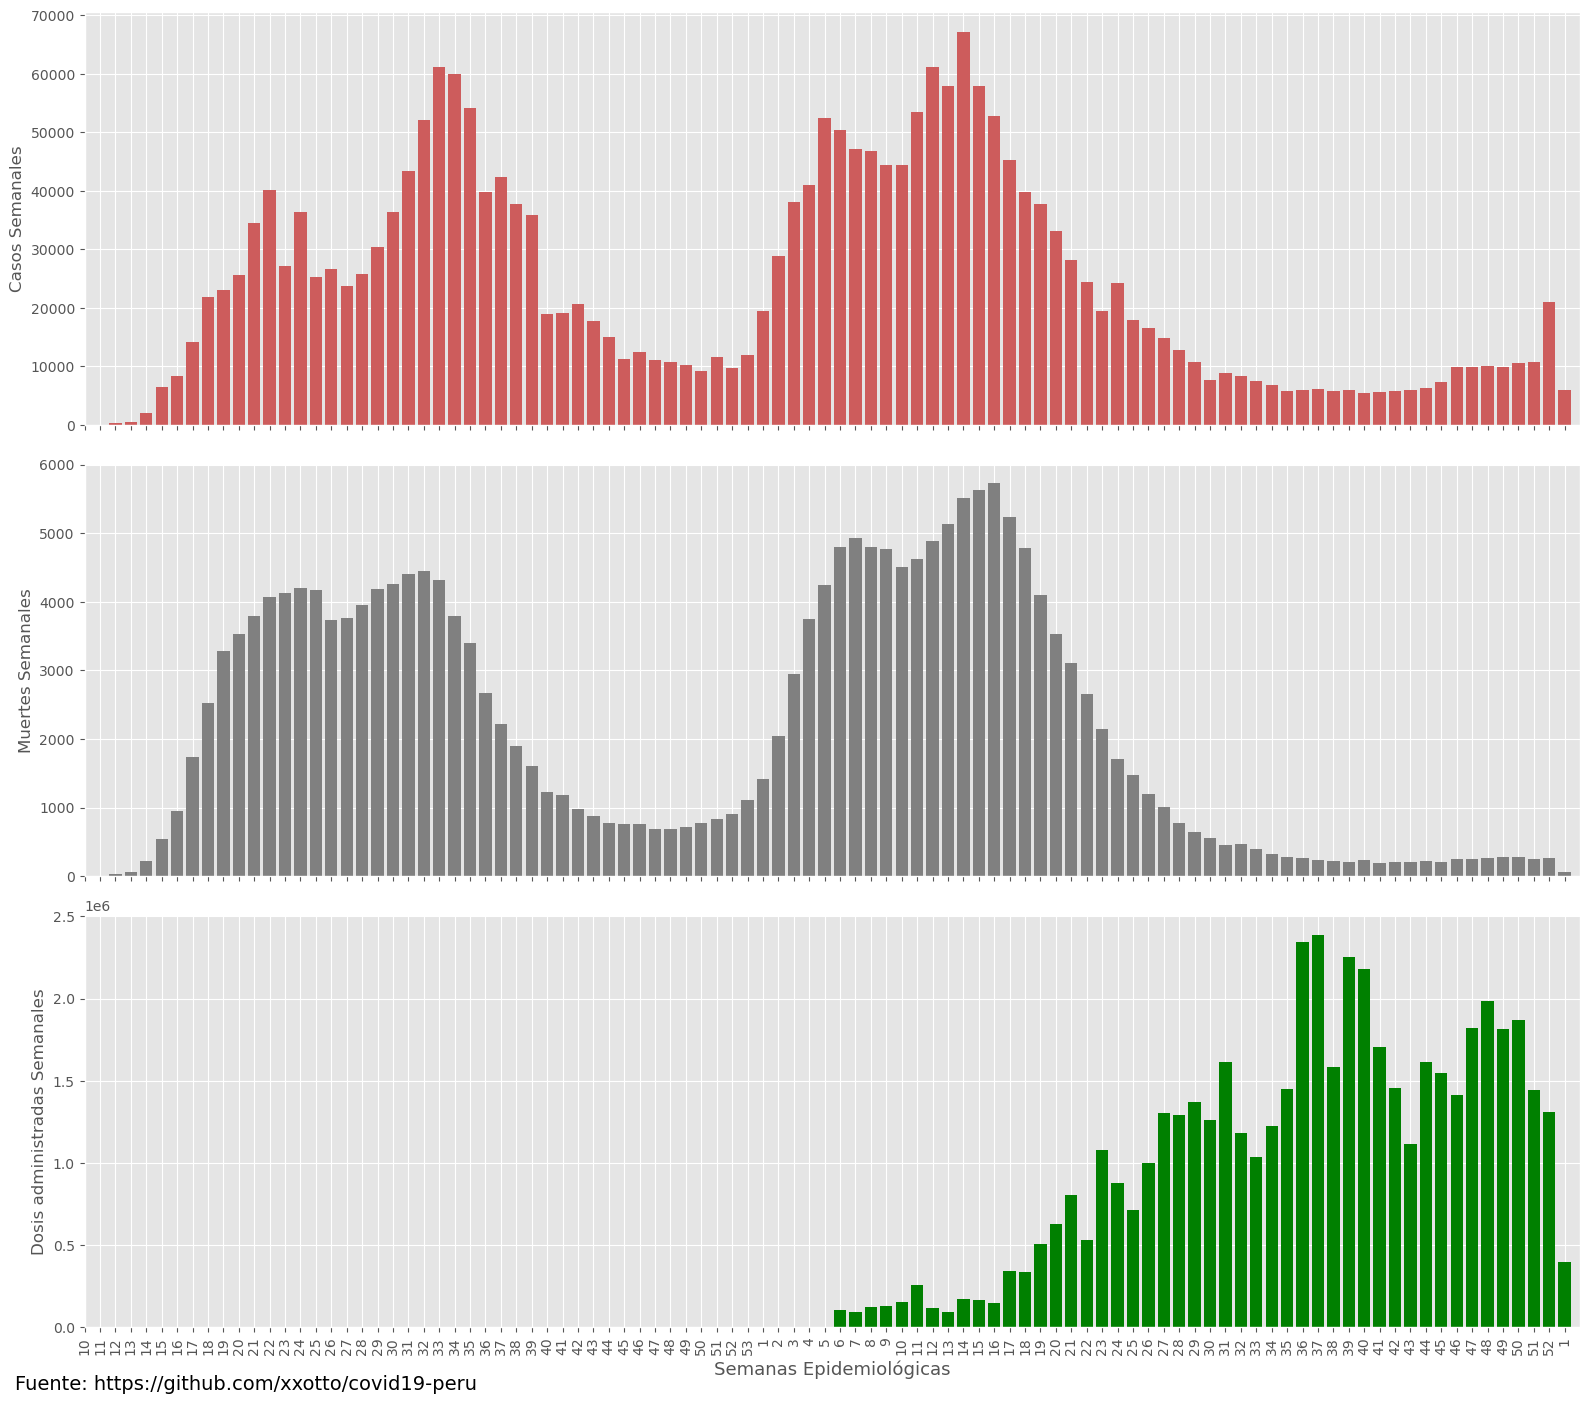

In [13]:
# Initialise the subplot function using number of rows and columns
X = np.arange(len(dp1['epi_week']))

fig, axis = plt.subplots(3, 1, figsize=(16,14), sharex=True)

axis[0].bar(X, dp1['total_casos'], color = 'indianred')
axis[0].set_ylabel('Casos Semanales')
axis[0].set_xlim(0, len(dp1['epi_week']))

axis[1].bar(X, dp1['total_fallecidos'], color = 'gray')
axis[1].set_ylabel('Muertes Semanales')

axis[2].bar(X, dp1['total_dosis_1'] + dp1['total_dosis_2'] + dp1['total_dosis_3'], color = 'green')
axis[2].set_ylabel('Dosis administradas Semanales')
axis[2].set_xticks(X, dp1['epi_week'], rotation = 90, size = 10)
plt.xlabel('Semanas Epidemiológicas', fontsize=13)
plt.tight_layout()

plt.text(-4.5, -380000, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=14)
plt.savefig('Images/covid19-peru_resumen_casos,fallecidos,vacunas_x_semanasEpi.png', bbox_inches='tight')

plt.show()